In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import itertools
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
import dtw

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
df_spx = yf.download(tickers = "^GSPC", period = "1d", start = "1970-03-01", end = "1973-03-01")
df_spx_covid = yf.download(tickers = "^GSPC", period = "1d", start = "2019-11-27", end = "2022-01-18")
df_spx_now = yf.download(tickers = "^GSPC", period = "1d", start = "2022-09-01")
df_spx_dot = yf.download(tickers = "^GSPC", period = "1d", start = "1998-07-01", end = "2001-02-01")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
scaler = MinMaxScaler()
df_spx_close = pd.DataFrame(df_spx["Close"])
df_spx_now_close = pd.DataFrame(df_spx_now["Close"])
df_spx_covid_close = pd.DataFrame(df_spx_covid["Close"])
df_spx_dot_close = pd.DataFrame(df_spx_dot["Close"])

nm_nparr_spx = scaler.fit_transform(df_spx_close)
nm_list_spx = nm_nparr_spx.tolist()
nm_df_spx = pd.DataFrame({"nm_Close": nm_list_spx})

nm_nparr_spx_covid = scaler.fit_transform(df_spx_covid_close)
nm_list_spx_covid = nm_nparr_spx_covid.tolist()
nm_df_spx_covid = pd.DataFrame({"nm_Close" : nm_list_spx_covid})

nm_nparr_spx_now = scaler.fit_transform(df_spx_now_close)
nm_list_spx_now = nm_nparr_spx_now.tolist()
nm_df_spx_now = pd.DataFrame({"nm_Close" : nm_list_spx_now})

nm_nparr_spx_dot = scaler.fit_transform(df_spx_dot_close)
nm_list_spx_dot = nm_nparr_spx_dot.tolist()
nm_df_spx_dot = pd.DataFrame({"nm_Close"}, nm_list_spx_dot)


df_spx_70 = pd.DataFrame({"ds" : df_spx.index, "y" : nm_df_spx["nm_Close"]})
df_spx_now = pd.DataFrame({"ds" : df_spx_now.index, "y" : nm_df_spx_now["nm_Close"]})
df_spx_covid = pd.DataFrame({"ds" : df_spx_covid.index, "y" : nm_df_spx_covid["nm_Close"]})
df_spx_covid.head()
#df_spx_23.reset_index(inplace=True)
#print(df_spx_70.round(5), df_spx_20.round(5))
#del df_spx_23['Date']

#dtw.dtw(nm_nparr_spx, nm_nparr_spx_20, keep_internals=True).plot(type="twoway")
spx_70_vs_now = dtw.dtw(nm_nparr_spx, nm_nparr_spx_now, keep_internals=True).distance
spx_dot_vs_now = dtw.dtw(nm_nparr_spx_dot, nm_nparr_spx_now, keep_internals=True).distance
spx_covid_vs_now = dtw.dtw(nm_nparr_spx_covid, nm_nparr_spx_now, keep_internals=True).distance
print(spx_70_vs_now, spx_dot_vs_now, spx_covid_vs_now, df_spx_covid)

19.946000988729196 25.50338668834175 15.88401654364793             ds                      y
0   2019-11-27   [0.3580197895122452]
1   2019-11-29  [0.35307679979241224]
2   2019-12-02   [0.3424835341794563]
3   2019-12-03    [0.334406600828824]
4   2019-12-04  [0.34204975616084976]
..         ...                    ...
533 2022-01-10   [0.9506595868090268]
534 2022-01-11   [0.9673759244136793]
535 2022-01-12   [0.9725652336505659]
536 2022-01-13   [0.9462596066519624]
537 2022-01-14   [0.9477524059559332]

[538 rows x 2 columns]


In [36]:
junk = []


nm_nparr_spx_now = scaler.fit_transform(df_spx_now_close)
nm_list_spx_now = nm_nparr_spx_now.tolist()
nm_df_spx_now_1 = pd.DataFrame(nm_nparr_spx_now)
df_spx_now_1 = pd.DataFrame({"ds" : df_spx_now_close.index, "y" : nm_df_spx_now_1[0]})
print(df_spx_now_1)

            ds         y
0   2022-09-01  0.385224
1   2022-09-02  0.343136
2   2022-09-06  0.327256
3   2022-09-07  0.398091
4   2022-09-08  0.424091
..         ...       ...
263 2023-09-20  0.815442
264 2023-09-21  0.744093
265 2023-09-22  0.734270
266 2023-09-25  0.751445
267 2023-09-26  0.688289

[268 rows x 2 columns]


In [6]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]


print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


In [7]:
warnings.filterwarnings("ignore")

for param in pdq :
    for param_seasonal in seasonal_pdq :
        try :
            mod = sm.tsa.statespace.SARIMAX(df_spx_now,
                                           order = param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            result = mod.fit()
            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0049      0.060     -0.082      0.935      -0.122       0.112
ma.S.L4       -1.0000    483.965     -0.002      0.998    -949.555     947.555
sigma2         0.0018      0.886      0.002      0.998      -1.735       1.739


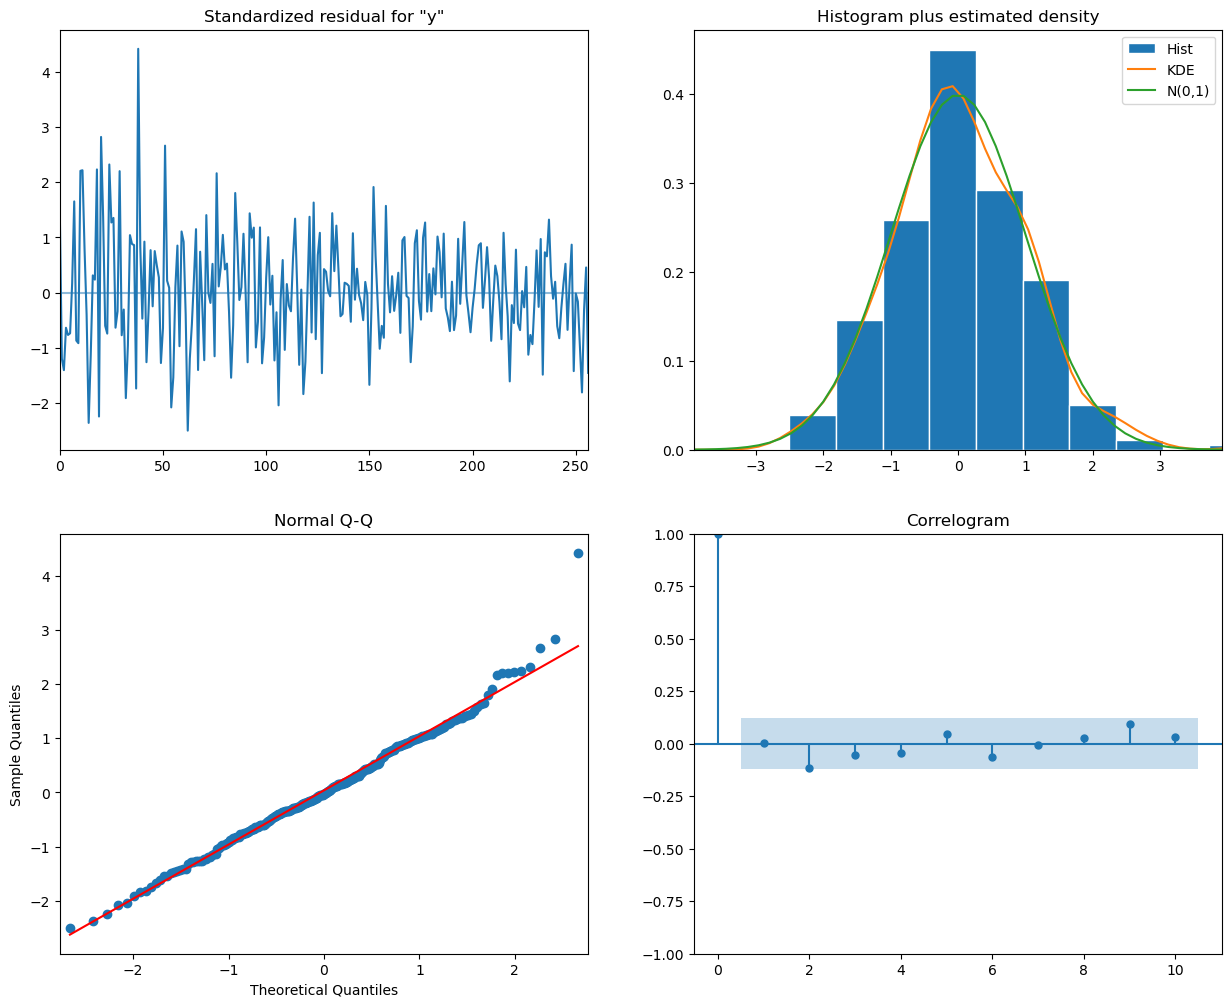

In [8]:
mod = sm.tsa.statespace.SARIMAX(nm_nparr_spx_now,
                               order=(0, 1, 1),
                               seasonal_order = (0, 1, 1, 4),
                               enforce_stationarity=False,
                               enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [37]:
m = Prophet(daily_seasonality = True)
m.fit(df_spx_now_1)

16:33:10 - cmdstanpy - INFO - Chain [1] start processing
16:33:10 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
future = m.make_future_dataframe(periods = 21)
future.tail()

,ds
284,2023-10-13
285,2023-10-14
286,2023-10-15
287,2023-10-16
288,2023-10-17


In [39]:
forecast = m.predict(future)
forecast['ds'].tail()

284   2023-10-13
285   2023-10-14
286   2023-10-15
287   2023-10-16
288   2023-10-17
Name: ds, dtype: datetime64[ns]

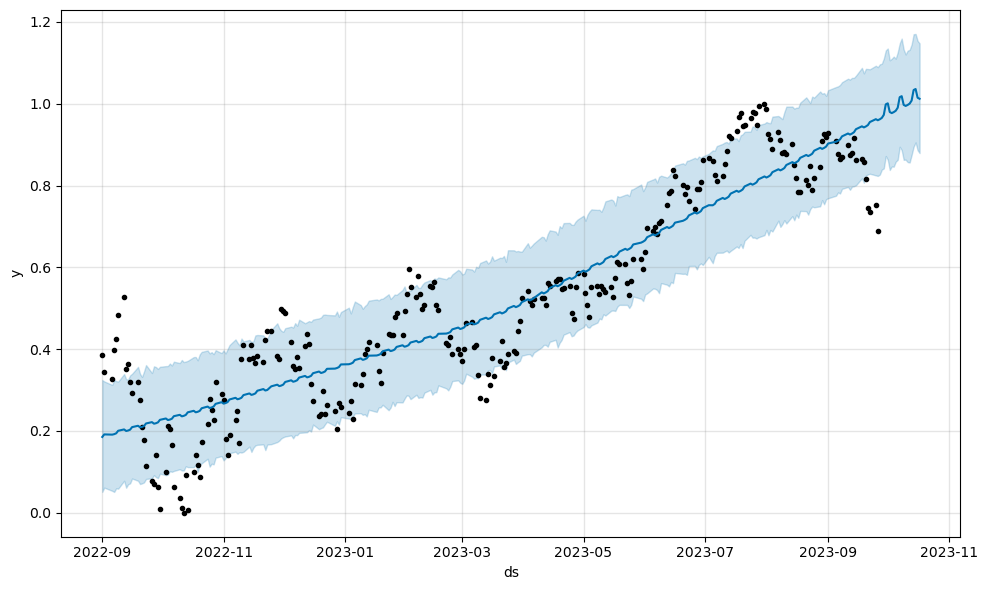

In [40]:
m.plot(forecast);